## Depolarising error Model 

Selecting the depolarizing channel error model introduces a random error in between each operation on a qubit. These errors are injected in a form of bit-flips (x error), phase-flips (z error) or both at the same time (y error), using equal probabilities for x, y and z errors.

The error injection process is depicted in the following figure which illustrate how errors are injected in a perfect circuit to produce a noisy circuit
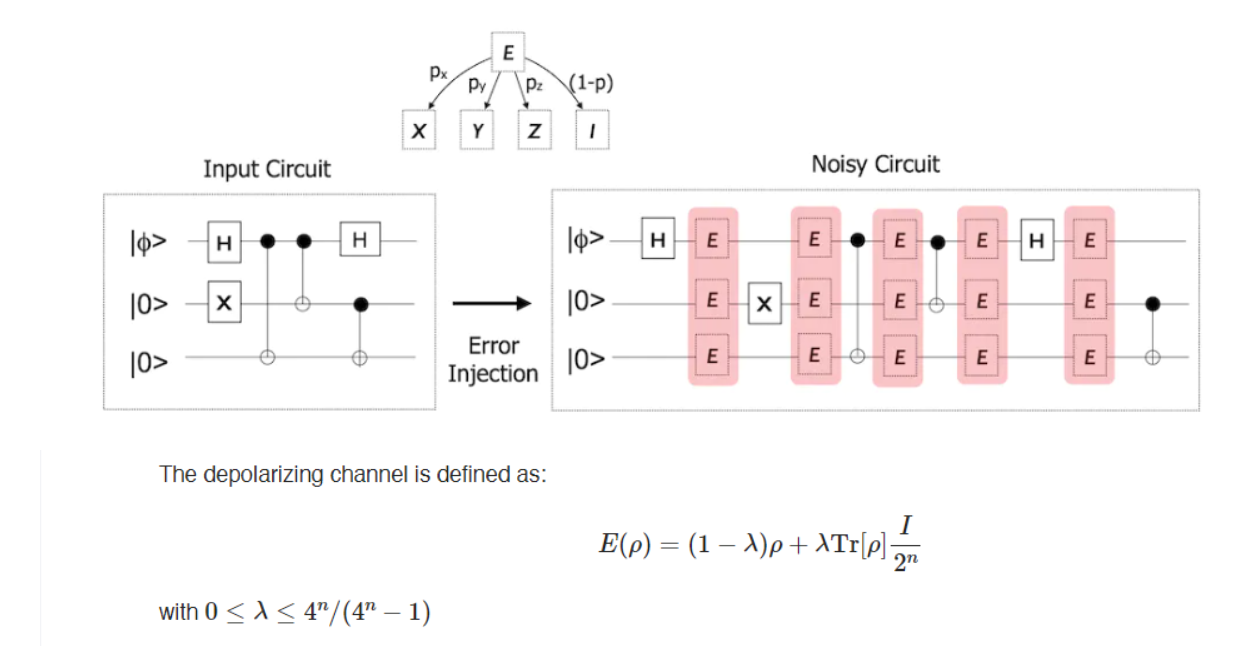

CPTP map with Kraus representation as : 
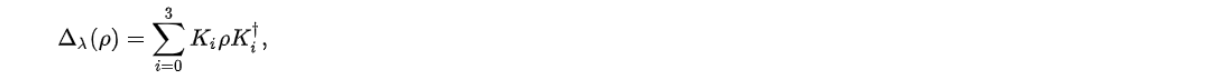 
We can express I,X,Y,Z  as K$_i$ which when operated on $\rho$ sum up to I. (Therefore valid map)

In [1]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')


In [5]:
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model


In [6]:
noise_model = get_noise(0.1,0.1)
#Gate based and Measurement based error. 


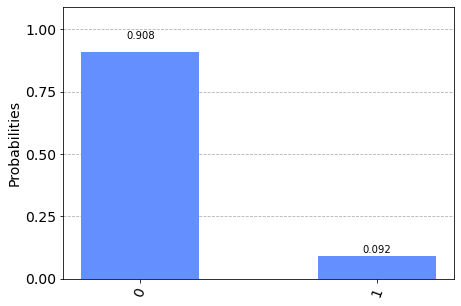

In [7]:
qc0 = QuantumCircuit(1) # initialize circuit with three qubits in the 0 state
qc0.measure_all() # measure the qubits

# run the circuit with the noise model and extract the counts
qobj = assemble(qc0)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)
